Here are some of the NLP techniques:
- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation TF
- Inverse Document Frequency IDF
- TFIDF Term Frequency - Inverse Document Frequency
- Text Classification

### N-Gram

##### please turn your page
- Unigram: `please | turn | your | page`
- Bigram: `please turn | turn your | your page`
- Trigram: `please turn your | turn your page`

An N-gram as the sequence of N words,
- A 2-gram (or bigram) is a two-word sequence of words like “please turn”, “turn your”, or ”your page”
- A 3-gram (or trigram) is a three-word sequence of words like “please turn your”, or “turn your page”

### Bag of Words (BoW)

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval.

`x = ['which book is this', 'this is book and this is math']`

|    |  and  |  book  |  is  |  math  |  this  |  which  |
|----|-------|--------|------|--------|--------|---------|
|0   |   0   |   1    |  1   |   0    |    1   |    1    |
|1   |   1   |   1    |  2   |   1    |    2   |    0    |

### Term Frequency (TF)

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.



`x = ['which book is this', 'this is book and this is math']`

|    |  and     |  book    |  is      |  math    |  this    |  which  |
|----|----------|----------|----------|----------|----------|---------|
|0   | 0.000000 | 0.250000 | 0.250000 | 0.000000 | 0.250000 | 0.25    |
|1   | 0.142857 | 0.142857 | 0.285714 | 0.142857 | 0.285714 | 0.00    |

### Inverse Document Frequency IDF

`idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True`

`log -> log base e`

where, N is the total number of rows and n is the number of rows in which the word was present.

> 1 idf
<br>
[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

### TFIDF

- Term Frequency: This summarizes how often a given word appears within a document.
- Inverse Document Frequency: This downscales words that appear a lot across documents.

`TF * IDF`

```
print(x_tfidf.toarray())
```
[[0.           0.44832087  0.44832087  0.          0.44832087 0.63009934]
<br>
 [0.39054766   0.27787788  0.55575576  0.39054766  0.55575576 0.        ]

## Data Loading

1.   Loading the data
2.   Data visualization
3.   Train test split
4.   Model building
5.   Training
6.   Evaluation
7.   Streamlit application



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.shape

(5572, 4)

In [5]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

## Dataset Balancing

In [6]:
ham = df[df['label']=='ham']
ham.shape

(4825, 4)

In [7]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [8]:
ham = ham.sample(spam.shape[0])

In [9]:
ham.shape


(747, 4)

In [10]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)

In [11]:
data.shape

(1494, 4)

In [12]:
data.sample(5)

,label,message,length,punct
759,spam,"As a valued customer, I am pleased to advise y...",152,3
1390,spam,Urgent -call 09066649731from Landline. Your co...,146,6
278,ham,ILL B DOWN SOON,15,0
1210,spam,Not heard from U4 a while. Call me now am here...,153,3
0,ham,tap & spile at seven. * Is that pub on gas st ...,72,5


## Exploratory Data Analysis

In [13]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [14]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

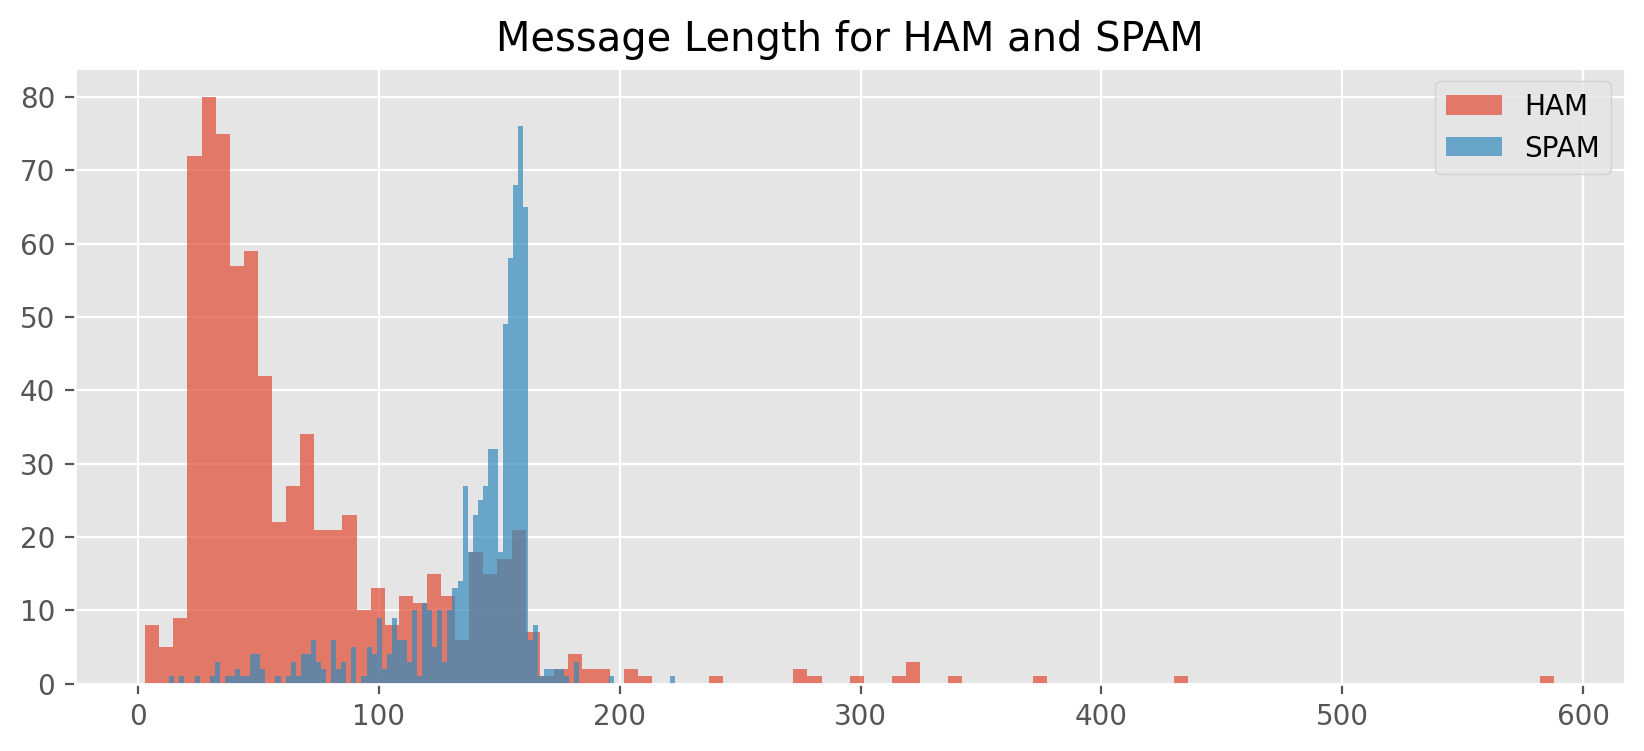

In [15]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show()

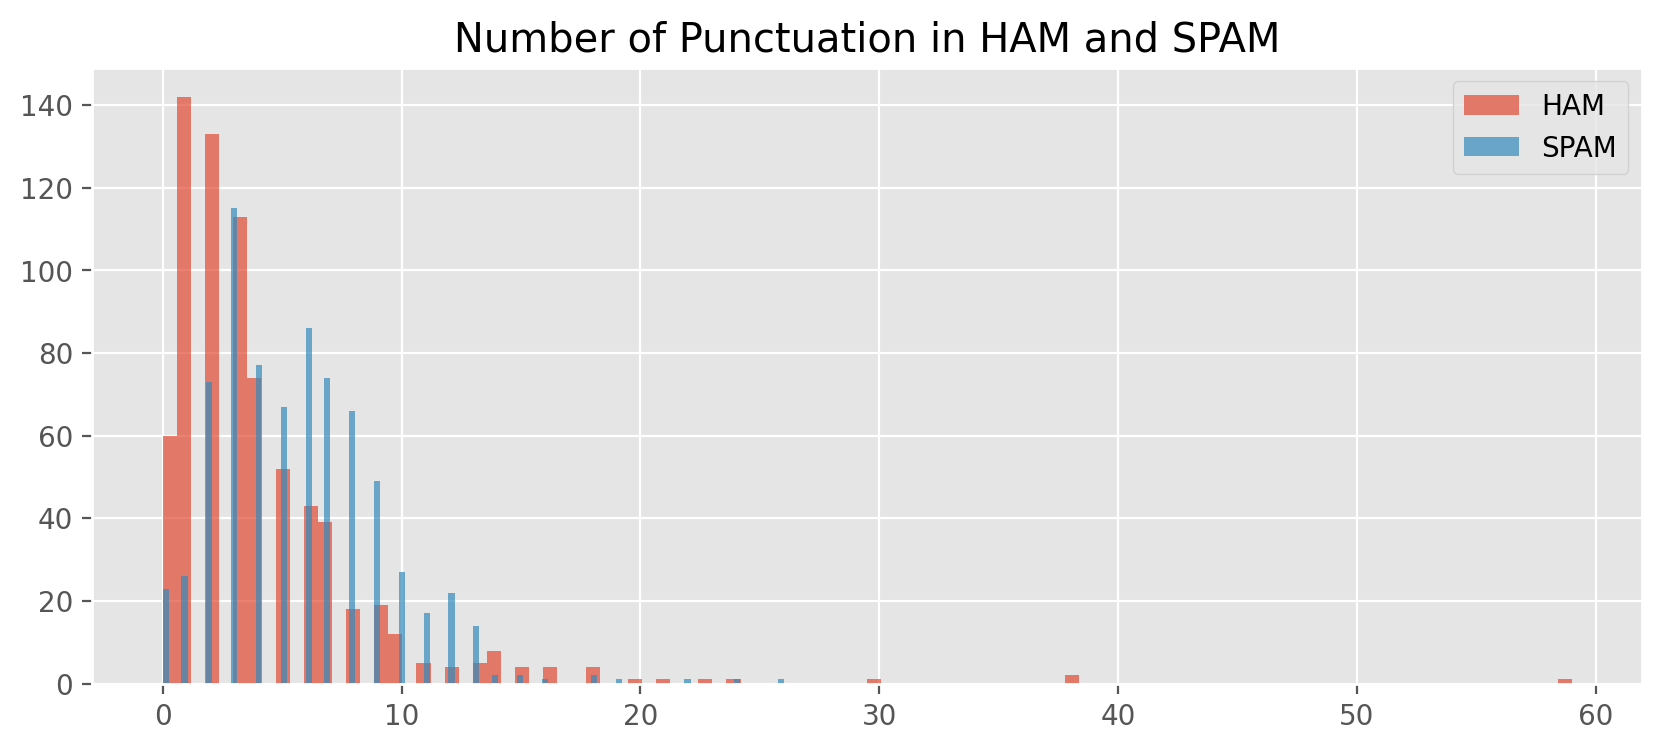

In [16]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()

## Data Preparation for Training

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.2, random_state=0,
                                                   shuffle=True, stratify=data['label'])

X_train.shape, X_test.shape

((1195,), (299,))

In [19]:
# model Building
clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       150
        spam       0.99      0.90      0.94       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [22]:
clf.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)

In [23]:
clf.classes_

array(['ham', 'spam'], dtype=object)

## Save and Load Model

In [24]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [25]:
model = pickle.load(open('model.pkl', 'rb'))

In [26]:
model.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)

In [27]:
import os
print(os.getcwd())

C:\Users\Minusha Attygala\OneDrive\Documents\NLP\Spam Text Classification
